In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.7.0
2.7.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

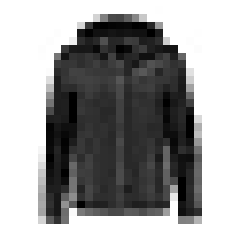

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

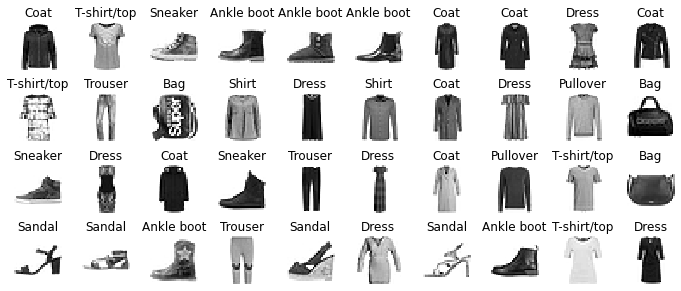

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad

Wykonaj analogiczne zadanie dla 
* Adam bez LearningRateScheduler i learning_rate=0.001
* Adam z użyciem LearningRateScheduler i learning_rate=0.001
* Adam z użyciem LearningRateScheduler i learning_rate=0.0001

Zwizualizuj wyniki:

* porównaj krzywe uczenia

In [12]:
from keras.callbacks import History
from keras.layers import *
from keras.models import Sequential

model1 = Sequential()
model1.add(Flatten(input_shape=(28,28,)))
model1.add(Dense(300,activation="relu"))
model1.add(Dense(100,activation="relu"))
model1.add(Dense(10,activation="softmax"))
model1.summary()

model1.compile(loss="sparse_categorical_crossentropy",
               optimizer=keras.optimizers.Adam(learning_rate=0.001), 
               metrics=["accuracy"])
    
history1 = model1.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=5)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2022-06-01 22:03:46.081337: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-01 22:03:46.184419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/5
1719/1719 [==============================] - ETA: 0s - loss: 0.4926 - accuracy: 0.8245

2022-06-01 22:03:55.322637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 10s 6ms/step - loss: 0.4926 - accuracy: 0.8245 - val_loss: 0.4121 - val_accuracy: 0.8476
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3656 - accuracy: 0.8653 - val_loss: 0.4309 - val_accuracy: 0.8357
Epoch 3/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3290 - accuracy: 0.8778 - val_loss: 0.3950 - val_accuracy: 0.8568
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3053 - accuracy: 0.8869 - val_loss: 0.3662 - val_accuracy: 0.8662
Epoch 5/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2879 - accuracy: 0.8917 - val_loss: 0.3416 - val_accuracy: 0.8736


In [13]:
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

In [15]:
from keras.callbacks import LearningRateScheduler

model2 = Sequential()
model2.add(Flatten(input_shape=(28,28,)))
model2.add(Dense(300,activation="relu"))
model2.add(Dense(100,activation="relu"))
model2.add(Dense(10,activation="softmax"))
model2.summary()

model2.compile(loss="sparse_categorical_crossentropy",
               optimizer=keras.optimizers.Adam(learning_rate=0.001), 
               metrics=["accuracy"])
    
lrate = LearningRateScheduler(step_decay)
history2 = model2.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=5, callbacks=[lrate])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
  17/1719 [..............................] - ETA: 11s - loss: 2.9783 - accuracy: 0.3603

2022-06-01 22:05:32.005545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.5618 - accuracy: 0.8012

2022-06-01 22:05:40.845339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 10s 6ms/step - loss: 0.5618 - accuracy: 0.8012 - val_loss: 0.4801 - val_accuracy: 0.8349 - lr: 0.0100
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4483 - accuracy: 0.8408 - val_loss: 0.4459 - val_accuracy: 0.8367 - lr: 0.0100
Epoch 3/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4211 - accuracy: 0.8508 - val_loss: 0.4389 - val_accuracy: 0.8506 - lr: 0.0100
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4033 - accuracy: 0.8560 - val_loss: 0.4917 - val_accuracy: 0.8309 - lr: 0.0100
Epoch 5/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3973 - accuracy: 0.8582 - val_loss: 0.4219 - val_accuracy: 0.8585 - lr: 0.0100


In [16]:
model3 = Sequential()
model3.add(Flatten(input_shape=(28,28,)))
model3.add(Dense(300,activation="relu"))
model3.add(Dense(100,activation="relu"))
model3.add(Dense(10,activation="softmax"))
model3.summary()

model3.compile(loss="sparse_categorical_crossentropy",
               optimizer=keras.optimizers.Adam(learning_rate=0.001), 
               metrics=["accuracy"])
    
lrate = LearningRateScheduler(step_decay)
history3 = model3.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=5, callbacks=[lrate])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
  21/1719 [..............................] - ETA: 8s - loss: 3.0232 - accuracy: 0.3333

2022-06-01 22:06:21.539292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.5653 - accuracy: 0.8007

2022-06-01 22:06:30.759688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 10s 6ms/step - loss: 0.5653 - accuracy: 0.8007 - val_loss: 0.4723 - val_accuracy: 0.8316 - lr: 0.0100
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4511 - accuracy: 0.8382 - val_loss: 0.4914 - val_accuracy: 0.8280 - lr: 0.0100
Epoch 3/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4253 - accuracy: 0.8482 - val_loss: 0.4593 - val_accuracy: 0.8397 - lr: 0.0100
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4095 - accuracy: 0.8544 - val_loss: 0.4838 - val_accuracy: 0.8339 - lr: 0.0100
Epoch 5/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4029 - accuracy: 0.8557 - val_loss: 0.4412 - val_accuracy: 0.8483 - lr: 0.0100


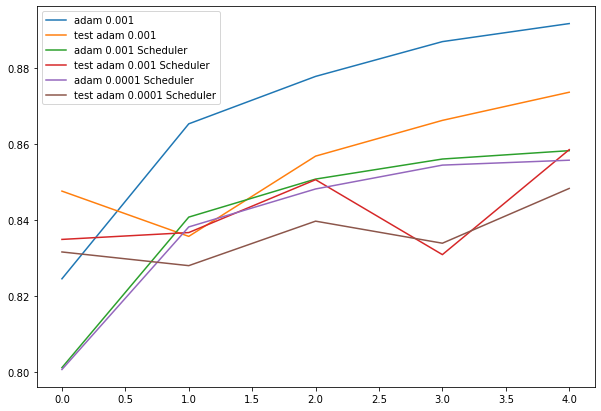

In [17]:
import matplotlib.pyplot as pl
plt.figure(figsize=(10, 7))

plt.plot(history1.history['accuracy'], label = "adam 0.001")
plt.plot(history1.history['val_accuracy'], label = "test adam 0.001")

plt.plot(history2.history['accuracy'], label = "adam 0.001 Scheduler")
plt.plot(history2.history['val_accuracy'], label = "test adam 0.001 Scheduler")

plt.plot(history3.history['accuracy'], label = "adam 0.0001 Scheduler")
plt.plot(history3.history['val_accuracy'], label = "test adam 0.0001 Scheduler")

plt.legend()
plt.show()